In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the dataset
file_path = "C:/Users/rites/Downloads/Rape Violation India (1970 - 2020).csv"
df = pd.read_csv(file_path)
df

,STATE/UT,YEAR,No. Of Cases In Which Offenders Were Known To The Victims,No. Of Cases In Which Offenders Were Parents / Close Family Members,No. Of Cases In Which Offenders Were Relatives,No. Of Cases In Which Offenders Were Neighbours,No. Of Cases In Which Offenders Were Other Known Persons
0,Andhra Pradesh,2001,871.0,4.0,81.0,247.0,539.0
1,Andhra Pradesh,2002,999.0,5.0,94.0,302.0,598.0
2,Andhra Pradesh,2003,946.0,15.0,82.0,299.0,550.0
3,Andhra Pradesh,2004,924.0,5.0,69.0,313.0,537.0
4,Andhra Pradesh,2005,935.0,18.0,98.0,399.0,420.0
...,...,...,...,...,...,...,...
508,Pune,1999,51.0,1.0,1.0,25.0,24.0
509,Surat,1999,17.0,0.0,0.0,4.0,13.0
510,Vadodra,1999,10.0,0.0,0.0,0.0,10.0
511,Varanasi,1999,0.0,0.0,0.0,0.0,0.0


In [17]:
# Data Cleaning
# Check for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()
print("Missing Values:")
print(missing_values)
print("\nDuplicates:", duplicates)

Missing Values:
STATE/UT                                                               0
YEAR                                                                   0
No. Of Cases In Which Offenders Were Known To The Victims              0
No. Of Cases In Which Offenders Were Parents / Close Family Members    0
No. Of Cases In Which Offenders Were Relatives                         0
No. Of Cases In Which Offenders Were Neighbours                        0
No. Of Cases In Which Offenders Were Other Known Persons               0
dtype: int64

Duplicates: 0


In [19]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
              YEAR  No. Of Cases In Which Offenders Were Known To The Victims  \
count   513.000000                                         513.000000           
mean   2006.095517                                         560.258285           
std       4.344159                                        1030.987864           
min    1999.000000                                           0.000000           
25%    2003.000000                                          24.000000           
50%    2006.000000                                         208.500000           
75%    2010.000000                                         846.000000           
max    2013.000000                                       12998.000000           

       No. Of Cases In Which Offenders Were Parents / Close Family Members  \
count                                         513.000000                     
mean                                           12.951267                     
std              

C:\Users\rites\AppData\Local\Temp\ipykernel_41884\861937400.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='YEAR', y='No. Of Cases In Which Offenders Were Known To The Victims', estimator='sum', ci=None)


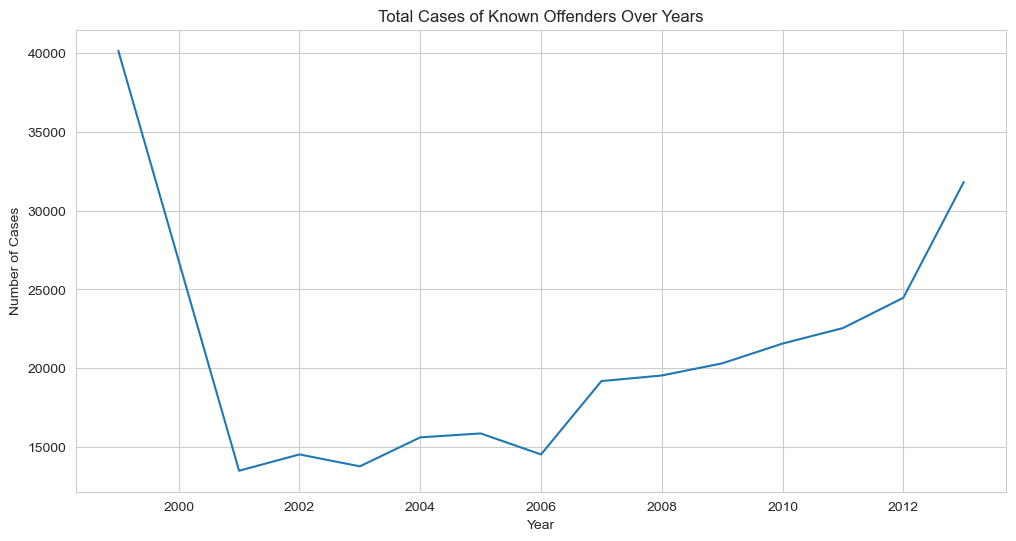

In [21]:
sns.set_style('whitegrid')

# Distribution of cases over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='YEAR', y='No. Of Cases In Which Offenders Were Known To The Victims', estimator='sum', ci=None)
plt.title('Total Cases of Known Offenders Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_41884\995866201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


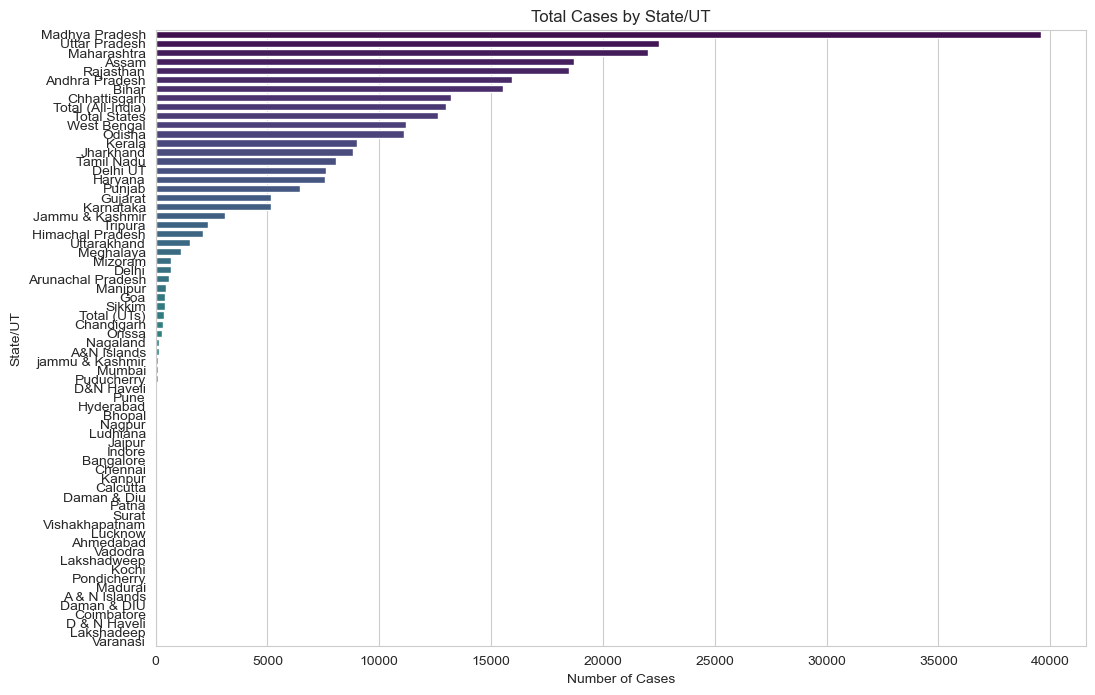

In [29]:
# Cases distribution across states
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df.groupby('STATE/UT', as_index=False).sum().sort_values(by='No. Of Cases In Which Offenders Were Known To The Victims', ascending=False),
    x='No. Of Cases In Which Offenders Were Known To The Victims',
    y='STATE/UT',
    palette='viridis')
plt.title('Total Cases by State/UT')
plt.xlabel('Number of Cases')
plt.ylabel('State/UT')
plt.show()


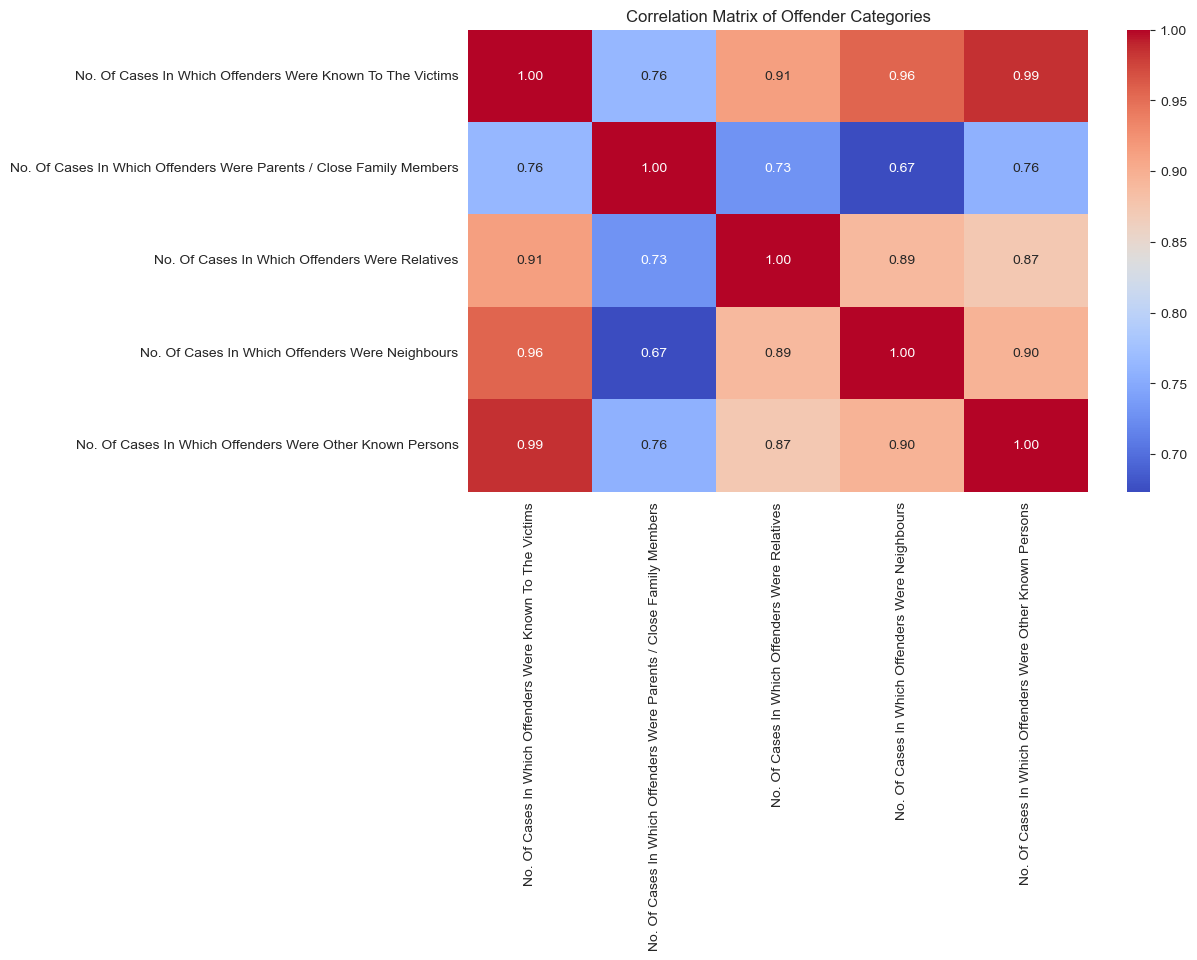

In [31]:
# Correlation heatmap of offender categories
plt.figure(figsize=(10, 6))
corr_matrix = df.iloc[:, 2:].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Offender Categories')
plt.show()

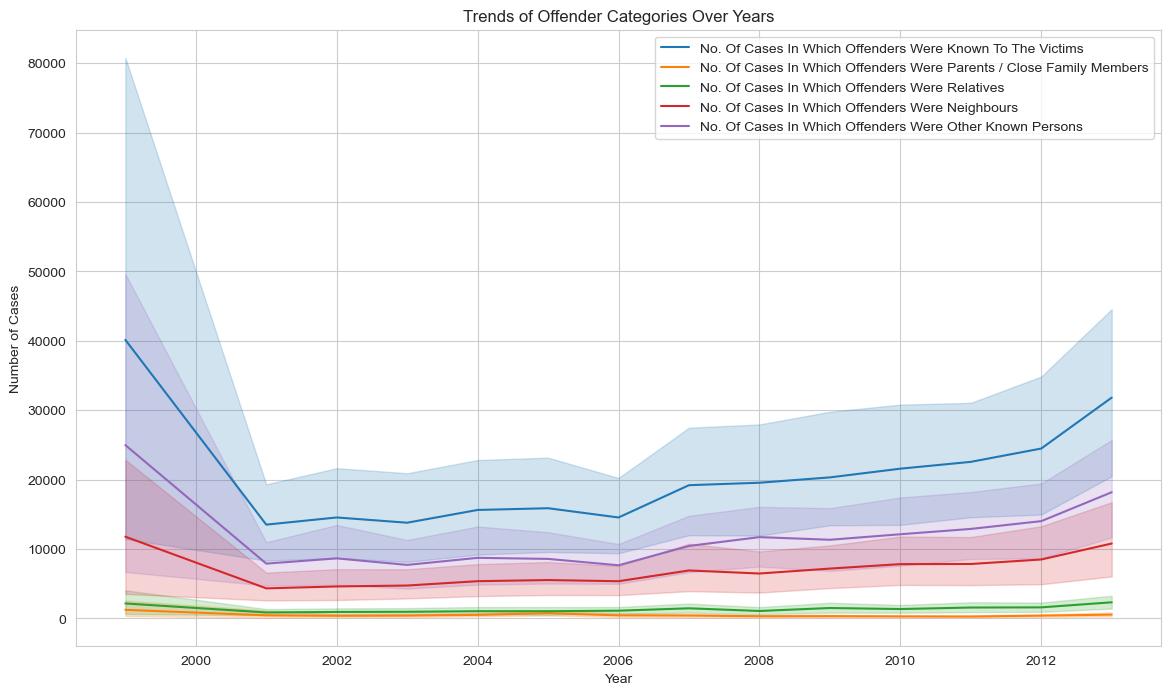

In [33]:
# Time-series trends of cases for each offender category
categories = [
    'No. Of Cases In Which Offenders Were Known To The Victims',
    'No. Of Cases In Which Offenders Were Parents / Close Family Members',
    'No. Of Cases In Which Offenders Were Relatives',
    'No. Of Cases In Which Offenders Were Neighbours',
    'No. Of Cases In Which Offenders Were Other Known Persons'
]

plt.figure(figsize=(14, 8))
for category in categories:
    sns.lineplot(data=df, x='YEAR', y=category, estimator='sum', label=category)

plt.title('Trends of Offender Categories Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()
